In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram


In [2]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
from keras import regularizers

In [4]:
import os

In [5]:
mylist= os.listdir('Rawdata/')

In [6]:
type(mylist)

list

In [7]:
print(mylist[550])

03-01-08-02-01-02-01.wav


In [8]:
print(mylist[550][6:-16])

08


In [9]:
data, sampling_rate = librosa.load('Rawdata/03-01-01-01-01-01-19.wav')

In [10]:

import os
import pandas as pd
import librosa
import glob 

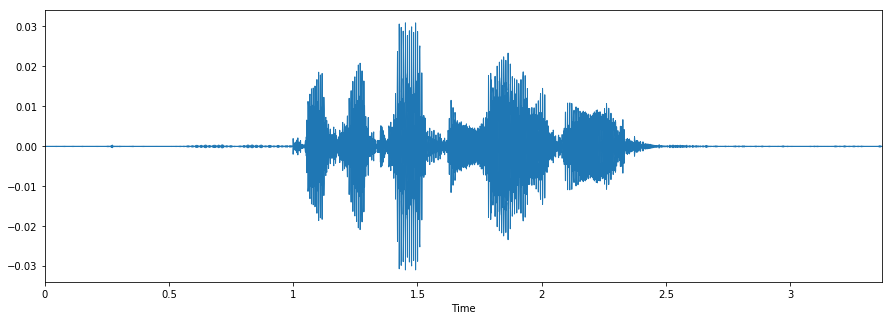

In [11]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [12]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

In [13]:
sr,x = scipy.io.wavfile.read('Rawdata/03-01-01-01-01-01-19.wav')

/home/user/main_project/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [14]:
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

In [15]:
window = np.hamming(nwin)

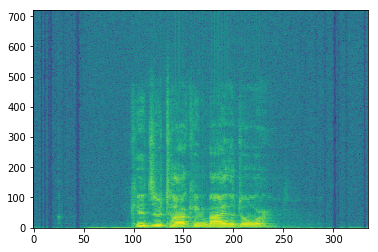

In [16]:
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [17]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
   

In [18]:
labels = pd.DataFrame(feeling_list)

In [19]:
labels[:10]

,0
0,male_calm
1,male_happy
2,male_sad
3,female_fearful
4,female_happy
5,male_sad
6,male_happy
7,male_happy
8,male_sad
9,female_angry


In [20]:
##feature extraction-mffc
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08':
        X,sample_rate = librosa.load('Rawdata/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=25),axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

           

In [21]:
print(feature)

[-23.35599756 -22.77801892 -23.62391439 -24.99767292 -22.59009184
 -22.96020015 -24.01252237 -23.94428786 -23.13601025 -22.5990139
 -23.41198682 -24.4635587  -22.65561957 -23.25705504 -21.50178487
 -22.03707391 -20.55476021 -20.40757474 -22.37643913 -22.13248016
 -20.66454166 -20.79315453 -20.86833975 -22.43947286 -21.38422048
 -21.74129865 -22.59475037 -21.6097124  -21.12318565 -22.01175535
 -22.00458148 -22.42414625 -23.78018537 -24.29977513 -23.71774179
 -23.75127142 -23.40565625 -22.61432083 -22.68845431 -23.05699721
 -22.20047709 -18.74798113 -16.38371556 -16.0630973  -15.52684048
 -14.9413858  -16.27970123 -19.08872469 -19.54525146 -20.34241274
 -21.29056541 -18.70245028 -19.29166046 -20.44502192 -21.68151308
 -23.42396386 -22.21069292 -22.1743538  -20.9656613  -19.6190285
 -22.45445859 -23.46137532 -23.22204676 -22.47856414 -22.08746843
 -21.67817518 -21.71568154 -21.50632617 -20.60336489 -20.3929186
 -20.97249395 -21.44771752 -21.41180513 -21.29866535 -21.14197162
 -20.66807751

In [22]:
df[:5]

,feature
0,"[-32.50955669921025, -31.201326047508946, -29...."
1,"[-24.907422845746197, -26.08444176570198, -27...."
2,"[-27.26961770163081, -26.52659236850379, -26.0..."
3,"[-23.380037280499714, -23.380037280499714, -23..."
4,"[-29.861819338380386, -29.52621815638771, -29...."


In [23]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [24]:
df3[:5]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-32.509557,-31.201326,-29.139484,-28.334778,-29.552999,-29.812785,-31.015759,-34.893067,-35.263925,-33.959787,...,-33.615045,-29.757894,-28.168236,-28.845891,-27.761670,-27.491228,-29.424270,-30.907969,-28.912760,-28.604026
1,-24.907423,-26.084442,-27.935184,-26.758846,-25.391836,-25.525948,-25.905698,-25.865012,-25.445997,-25.224029,...,-15.972165,-16.256074,-18.403136,-18.132717,-17.753707,-16.533119,-15.473131,-14.968656,-9.092972,-5.189356
2,-27.269618,-26.526592,-26.072377,-25.428513,-25.022973,-25.912779,-24.853766,-24.654965,-23.934085,-23.636177,...,-18.451484,-19.196367,-18.695702,-18.517029,-18.007527,-18.814511,-19.241044,-19.519149,-15.102658,-12.316998
3,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,...,-18.593352,-17.165853,-16.268870,-17.301442,-18.442931,-19.399098,-20.753569,-20.940661,-19.215331,-15.910619
4,-29.861819,-29.526218,-29.043835,-29.726429,-30.108358,-30.035172,-30.064375,-30.074114,-30.068336,-29.888189,...,-23.856675,-25.829373,-29.646530,-25.320521,-19.648006,-17.360294,-17.518236,-18.122084,-10.998631,-7.321549


In [25]:
df3 = pd.DataFrame(df['feature'].values.tolist())


df3[:5]


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-32.509557,-31.201326,-29.139484,-28.334778,-29.552999,-29.812785,-31.015759,-34.893067,-35.263925,-33.959787,...,-33.615045,-29.757894,-28.168236,-28.845891,-27.761670,-27.491228,-29.424270,-30.907969,-28.912760,-28.604026
1,-24.907423,-26.084442,-27.935184,-26.758846,-25.391836,-25.525948,-25.905698,-25.865012,-25.445997,-25.224029,...,-15.972165,-16.256074,-18.403136,-18.132717,-17.753707,-16.533119,-15.473131,-14.968656,-9.092972,-5.189356
2,-27.269618,-26.526592,-26.072377,-25.428513,-25.022973,-25.912779,-24.853766,-24.654965,-23.934085,-23.636177,...,-18.451484,-19.196367,-18.695702,-18.517029,-18.007527,-18.814511,-19.241044,-19.519149,-15.102658,-12.316998
3,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,...,-18.593352,-17.165853,-16.268870,-17.301442,-18.442931,-19.399098,-20.753569,-20.940661,-19.215331,-15.910619
4,-29.861819,-29.526218,-29.043835,-29.726429,-30.108358,-30.035172,-30.064375,-30.074114,-30.068336,-29.888189,...,-23.856675,-25.829373,-29.646530,-25.320521,-19.648006,-17.360294,-17.518236,-18.122084,-10.998631,-7.321549


In [26]:
newdf = pd.concat([df3,labels], axis=1)


In [27]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [28]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-32.509557,-31.201326,-29.139484,-28.334778,-29.552999,-29.812785,-31.015759,-34.893067,-35.263925,-33.959787,...,-29.757894,-28.168236,-28.845891,-27.761670,-27.491228,-29.424270,-30.907969,-28.912760,-28.604026,male_calm
1,-24.907423,-26.084442,-27.935184,-26.758846,-25.391836,-25.525948,-25.905698,-25.865012,-25.445997,-25.224029,...,-16.256074,-18.403136,-18.132717,-17.753707,-16.533119,-15.473131,-14.968656,-9.092972,-5.189356,male_happy
2,-27.269618,-26.526592,-26.072377,-25.428513,-25.022973,-25.912779,-24.853766,-24.654965,-23.934085,-23.636177,...,-19.196367,-18.695702,-18.517029,-18.007527,-18.814511,-19.241044,-19.519149,-15.102658,-12.316998,male_sad
3,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,-23.380037,...,-17.165853,-16.268870,-17.301442,-18.442931,-19.399098,-20.753569,-20.940661,-19.215331,-15.910619,female_fearful
4,-29.861819,-29.526218,-29.043835,-29.726429,-30.108358,-30.035172,-30.064375,-30.074114,-30.068336,-29.888189,...,-25.829373,-29.646530,-25.320521,-19.648006,-17.360294,-17.518236,-18.122084,-10.998631,-7.321549,female_happy


In [29]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
787,-26.137216,-26.121563,-25.028560,-24.991952,-25.652225,-24.748869,-23.883419,-24.042803,-24.727678,-25.579299,...,-16.411607,-16.477368,-16.621762,-16.707809,-16.880919,-17.233771,-17.031965,-11.047445,-7.171528,female_happy
1060,-31.289255,-31.289255,-31.289255,-31.289255,-31.289255,-31.289255,-31.289255,-31.289255,-31.289255,-31.289255,...,-13.432111,-12.859011,-12.764367,-13.031011,-14.045784,-13.465864,-12.485709,-12.927044,-10.224968,male_angry
749,-29.474740,-29.474740,-29.474740,-29.474740,-29.474740,-29.474740,-29.474740,-29.474740,-29.474740,-29.474740,...,-19.249684,-19.240974,-19.968473,-20.147927,-19.419925,-21.156704,-21.211615,-10.783017,-7.554992,female_happy
1094,-39.692357,-39.692357,-39.692357,-39.692357,-39.692357,-39.692357,-39.692357,-39.692357,-39.692357,-39.692357,...,-38.724368,-38.247247,-38.957691,-38.042869,-38.800557,-39.003547,-39.683030,-39.692357,-39.692357,female_calm
238,-22.758573,-23.761404,-26.307212,-23.283821,-22.106235,-23.200763,-22.205004,-22.603609,-25.564185,-25.097065,...,-14.642539,-14.218266,-14.915279,-14.990654,-14.818223,-13.473982,-13.932256,-13.110966,-10.320548,male_sad
420,-30.296299,-30.691900,-31.034150,-31.060993,-30.625588,-33.389188,-33.888099,-34.286730,-34.286730,-34.028552,...,-30.232371,-30.662323,-30.886148,-31.060610,-31.471381,-30.815927,-29.034569,-28.019642,-29.055649,female_sad
1822,-13.064935,-13.342556,-11.303737,-11.500773,-13.879042,-14.161904,-13.675271,-13.603385,-14.957681,-15.209165,...,-22.415460,-22.537039,-22.638941,-22.695287,-23.460675,-23.353077,-22.710690,-22.785912,-23.568723,female_fearful
145,-29.450464,-29.450464,-29.450464,-29.450464,-29.320731,-29.261884,-29.385277,-29.450464,-29.450464,-29.450464,...,-24.871797,-23.738407,-23.422047,-22.110975,-22.557463,-24.409967,-23.316934,-16.423389,-12.745648,female_sad
671,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,...,-20.342021,-20.352878,-21.454021,-21.606856,-22.327193,-21.446975,-19.879053,-12.860046,-9.319211,female_happy
323,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-29.799491,...,-25.753248,-25.939237,-26.540893,-26.342312,-26.966139,-27.156009,-27.044847,-26.625328,-26.419609,female_fearful


In [30]:
rnewdf=rnewdf.fillna(0)

In [31]:
print(len(rnewdf))

1880


In [32]:
##splitting train data and test data
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [33]:
newdf1

array([ True, False, False, ..., False,  True,  True])

In [34]:
newdf1.shape

(1880,)

In [35]:
train.shape

(1502, 217)

In [36]:
test.shape

(378, 217)

In [37]:
trainfeatures = train.iloc[:, :-1]

In [38]:
trainfeatures

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
787,-26.137216,-26.121563,-25.028560,-24.991952,-25.652225,-24.748869,-23.883419,-24.042803,-24.727678,-25.579299,...,-15.860516,-16.411607,-16.477368,-16.621762,-16.707809,-16.880919,-17.233771,-17.031965,-11.047445,-7.171528
238,-22.758573,-23.761404,-26.307212,-23.283821,-22.106235,-23.200763,-22.205004,-22.603609,-25.564185,-25.097065,...,-15.947575,-14.642539,-14.218266,-14.915279,-14.990654,-14.818223,-13.473982,-13.932256,-13.110966,-10.320548
1822,-13.064935,-13.342556,-11.303737,-11.500773,-13.879042,-14.161904,-13.675271,-13.603385,-14.957681,-15.209165,...,-22.581893,-22.415460,-22.537039,-22.638941,-22.695287,-23.460675,-23.353077,-22.710690,-22.785912,-23.568723
145,-29.450464,-29.450464,-29.450464,-29.450464,-29.320731,-29.261884,-29.385277,-29.450464,-29.450464,-29.450464,...,-22.624041,-24.871797,-23.738407,-23.422047,-22.110975,-22.557463,-24.409967,-23.316934,-16.423389,-12.745648
671,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,-27.859792,...,-20.897503,-20.342021,-20.352878,-21.454021,-21.606856,-22.327193,-21.446975,-19.879053,-12.860046,-9.319211
323,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-31.142371,-29.799491,...,-25.691859,-25.753248,-25.939237,-26.540893,-26.342312,-26.966139,-27.156009,-27.044847,-26.625328,-26.419609
589,-22.790517,-22.540967,-22.201617,-22.535361,-22.790517,-22.790517,-22.790517,-22.521270,-22.558942,-22.790517,...,-12.449383,-10.834546,-10.256394,-11.097211,-12.237590,-11.949862,-12.524003,-13.189948,-14.756379,-12.871666
214,-29.874035,-31.355669,-33.112098,-31.560613,-31.230151,-32.579681,-32.818550,-33.727225,-33.845751,-33.401476,...,-28.558720,-30.614740,-31.780763,-30.490831,-29.933738,-28.957387,-28.341816,-28.760269,-30.022380,-28.020455
1700,-23.262105,-23.048772,-22.711985,-22.797995,-22.005685,-21.321443,-20.843849,-20.394460,-20.461097,-21.513235,...,-23.205633,-22.400910,-21.347053,-21.299669,-22.246139,-21.428402,-20.437196,-16.930025,-9.600402,-5.442518
203,-28.058800,-26.863509,-25.578227,-26.905898,-26.622476,-27.614098,-27.211593,-26.681937,-26.752832,-26.344322,...,-20.283389,-20.401635,-21.059279,-21.562306,-20.753431,-20.433172,-21.499913,-25.457908,-25.181821,-23.962095


In [39]:
trainlabel = train.iloc[:, -1:]

In [40]:
trainlabel

,0
787,female_happy
238,male_sad
1822,female_fearful
145,female_sad
671,female_happy
323,female_fearful
589,male_angry
214,female_fearful
1700,female_angry
203,male_calm


In [41]:
testfeatures = test.iloc[:, :-1]

In [42]:
testlabel = test.iloc[:, -1:]

In [43]:
##model creation and fitting
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [44]:
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

In [45]:
X_train

array([[-26.1372159 , -26.12156339, -25.02855963, ..., -17.03196521,
        -11.04744516,  -7.17152774],
       [-22.75857338, -23.76140389, -26.3072124 , ..., -13.93225576,
        -13.1109663 , -10.32054813],
       [-13.06493479, -13.34255634, -11.30373671, ..., -22.71069045,
        -22.78591158, -23.56872331],
       ...,
       [-30.64483281, -30.64270239, -29.84728206, ..., -20.14283198,
        -20.83978899, -21.85624284],
       [-21.09463209, -21.97620049, -22.78042471, ...,  -8.28444674,
         -5.81417099,  -2.50057691],
       [-27.97404008, -24.64064397, -23.25074554, ..., -18.03248382,
        -18.56966152, -19.49096659]])

In [46]:
y_train.shape

(1502, 1)

In [47]:
X_test

array([[-31.28925493, -31.28925493, -31.28925493, ..., -12.48570935,
        -12.92704444, -10.22496825],
       [-29.47474033, -29.47474033, -29.47474033, ..., -21.21161501,
        -10.78301682,  -7.55499155],
       [-39.69235674, -39.69235674, -39.69235674, ..., -39.68302954,
        -39.69235674, -39.69235674],
       ...,
       [-26.94876448, -27.11795578, -26.28939168, ..., -24.08246212,
        -24.55479073, -21.80670543],
       [-30.49460807, -30.49460807, -30.47002591, ..., -19.36708242,
        -11.60564815,  -7.77009754],
       [-25.61116288, -25.17012728, -25.44835957, ..., -24.81809576,
        -27.01995004, -29.02140943]])

In [48]:
y_test

array([['male_angry'],
       ['female_happy'],
       ['female_calm'],
       ['female_sad'],
       ['male_angry'],
       ['male_sad'],
       ['female_sad'],
       ['female_angry'],
       ['male_angry'],
       ['male_calm'],
       ['male_happy'],
       ['female_calm'],
       ['male_happy'],
       ['female_sad'],
       ['female_calm'],
       ['female_calm'],
       ['female_calm'],
       ['male_sad'],
       ['female_fearful'],
       ['female_calm'],
       ['male_calm'],
       ['male_angry'],
       ['male_sad'],
       ['male_happy'],
       ['male_fearful'],
       ['male_fearful'],
       ['female_calm'],
       ['female_fearful'],
       ['female_happy'],
       ['female_fearful'],
       ['female_sad'],
       ['male_sad'],
       ['male_happy'],
       ['female_angry'],
       ['female_happy'],
       ['female_fearful'],
       ['female_happy'],
       ['male_happy'],
       ['female_angry'],
       ['male_calm'],
       ['female_angry'],
       ['male_fearful'],


In [49]:
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

y_train
y_test

/home/user/main_project/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [50]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
X_train.shape


(1502, 216)

In [52]:
X_test.shape

(378, 216)

In [53]:
y_train.shape

(1502, 10)

In [54]:
y_test.shape
X_train

array([[-26.1372159 , -26.12156339, -25.02855963, ..., -17.03196521,
        -11.04744516,  -7.17152774],
       [-22.75857338, -23.76140389, -26.3072124 , ..., -13.93225576,
        -13.1109663 , -10.32054813],
       [-13.06493479, -13.34255634, -11.30373671, ..., -22.71069045,
        -22.78591158, -23.56872331],
       ...,
       [-30.64483281, -30.64270239, -29.84728206, ..., -20.14283198,
        -20.83978899, -21.85624284],
       [-21.09463209, -21.97620049, -22.78042471, ...,  -8.28444674,
         -5.81417099,  -2.50057691],
       [-27.97404008, -24.64064397, -23.25074554, ..., -18.03248382,
        -18.56966152, -19.49096659]])

In [55]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [56]:
x_traincnn.shape

(1502, 216, 1)

In [57]:
x_traincnn

array([[[-26.1372159 ],
        [-26.12156339],
        [-25.02855963],
        ...,
        [-17.03196521],
        [-11.04744516],
        [ -7.17152774]],

       [[-22.75857338],
        [-23.76140389],
        [-26.3072124 ],
        ...,
        [-13.93225576],
        [-13.1109663 ],
        [-10.32054813]],

       [[-13.06493479],
        [-13.34255634],
        [-11.30373671],
        ...,
        [-22.71069045],
        [-22.78591158],
        [-23.56872331]],

       ...,

       [[-30.64483281],
        [-30.64270239],
        [-29.84728206],
        ...,
        [-20.14283198],
        [-20.83978899],
        [-21.85624284]],

       [[-21.09463209],
        [-21.97620049],
        [-22.78042471],
        ...,
        [ -8.28444674],
        [ -5.81417099],
        [ -2.50057691]],

       [[-27.97404008],
        [-24.64064397],
        [-23.25074554],
        ...,
        [-18.03248382],
        [-18.56966152],
        [-19.49096659]]])

In [58]:
##creating neural network layers
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
__________

In [60]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [61]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1400, validation_data=(x_testcnn, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1502 samples, validate on 378 samples
Epoch 1/1400
1502/1502 [==============================] - 7s 5ms/step - loss: 2.3898 - acc: 0.0945 - val_loss: 2.2884 - val_acc: 0.1138
Epoch 2/1400
1502/1502 [==============================] - 7s 4ms/step - loss: 2.2782 - acc: 0.1278 - val_loss: 2.2681 - val_acc: 0.1296
Epoch 3/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 2.2566 - acc: 0.1325 - val_loss: 2.2445 - val_acc: 0.1534
Epoch 4/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 2.2427 - acc: 0.1545 - val_loss: 2.2235 - val_acc: 0.2196
Epoch 5/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 2.2272 - acc: 0.1744 - val_loss: 2.2124 - val_acc: 0.1561
Epoch 6/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 2.2112 - acc: 0.1924 - val_loss: 2.1992 - val_acc: 0.1984
Epoch 7/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 2.1961 - ac

1502/1502 [==============================] - 6s 4ms/step - loss: 1.5894 - acc: 0.4075 - val_loss: 1.6428 - val_acc: 0.3704
Epoch 59/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.5799 - acc: 0.3928 - val_loss: 1.6371 - val_acc: 0.3571
Epoch 60/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.5773 - acc: 0.4015 - val_loss: 1.6308 - val_acc: 0.3571
Epoch 61/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.5719 - acc: 0.4148 - val_loss: 1.6559 - val_acc: 0.3254
Epoch 62/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.5650 - acc: 0.4234 - val_loss: 1.6421 - val_acc: 0.3545
Epoch 63/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.5602 - acc: 0.4134 - val_loss: 1.6473 - val_acc: 0.3333
Epoch 64/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.5585 - acc: 0.4095 - val_loss: 1.6151 - val_acc: 0.3254
Epoch 65/1400
1502/1502 [==============================

Epoch 118/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.3863 - acc: 0.4707 - val_loss: 1.5280 - val_acc: 0.3889
Epoch 119/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.3780 - acc: 0.4927 - val_loss: 1.5200 - val_acc: 0.3810
Epoch 120/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.3697 - acc: 0.4953 - val_loss: 1.5663 - val_acc: 0.3677
Epoch 121/1400
1502/1502 [==============================] - 7s 4ms/step - loss: 1.3708 - acc: 0.4854 - val_loss: 1.5510 - val_acc: 0.3413
Epoch 122/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.3680 - acc: 0.4767 - val_loss: 1.5395 - val_acc: 0.3810
Epoch 123/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.3707 - acc: 0.4794 - val_loss: 1.5333 - val_acc: 0.3598
Epoch 124/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.3730 - acc: 0.4740 - val_loss: 1.5251 - val_acc: 0.3783
Epoch 125/1400
1502/1502 [========

1502/1502 [==============================] - 6s 4ms/step - loss: 1.2557 - acc: 0.5213 - val_loss: 1.5622 - val_acc: 0.3624
Epoch 178/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.2623 - acc: 0.5153 - val_loss: 1.5337 - val_acc: 0.3677
Epoch 179/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.2535 - acc: 0.5120 - val_loss: 1.5408 - val_acc: 0.3624
Epoch 180/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.2515 - acc: 0.5193 - val_loss: 1.5317 - val_acc: 0.3968
Epoch 181/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.2500 - acc: 0.5260 - val_loss: 1.5244 - val_acc: 0.3810
Epoch 182/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.2448 - acc: 0.5213 - val_loss: 1.5356 - val_acc: 0.3836
Epoch 183/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.2393 - acc: 0.5273 - val_loss: 1.6007 - val_acc: 0.3598
Epoch 184/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 1.1439 - acc: 0.5646 - val_loss: 1.5392 - val_acc: 0.3836
Epoch 237/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.1482 - acc: 0.5686 - val_loss: 1.5389 - val_acc: 0.3598
Epoch 238/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.1450 - acc: 0.5699 - val_loss: 1.5329 - val_acc: 0.3757
Epoch 239/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.1461 - acc: 0.5779 - val_loss: 1.5108 - val_acc: 0.3889
Epoch 240/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.1389 - acc: 0.5719 - val_loss: 1.5217 - val_acc: 0.3757
Epoch 241/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.1396 - acc: 0.5659 - val_loss: 1.5518 - val_acc: 0.3836
Epoch 242/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.1402 - acc: 0.5679 - val_loss: 1.5225 - val_acc: 0.3810
Epoch 243/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 1.0383 - acc: 0.6079 - val_loss: 1.5419 - val_acc: 0.3862
Epoch 296/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.0385 - acc: 0.6212 - val_loss: 1.5437 - val_acc: 0.3651
Epoch 297/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.0401 - acc: 0.6145 - val_loss: 1.5574 - val_acc: 0.3836
Epoch 298/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.0366 - acc: 0.6119 - val_loss: 1.5513 - val_acc: 0.3889
Epoch 299/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.0297 - acc: 0.6138 - val_loss: 1.5558 - val_acc: 0.3545
Epoch 300/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.0286 - acc: 0.6132 - val_loss: 1.5639 - val_acc: 0.3545
Epoch 301/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.0272 - acc: 0.6185 - val_loss: 1.5295 - val_acc: 0.4048
Epoch 302/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.9304 - acc: 0.6711 - val_loss: 1.5894 - val_acc: 0.3757
Epoch 355/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.9275 - acc: 0.6631 - val_loss: 1.6062 - val_acc: 0.3651
Epoch 356/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.9269 - acc: 0.6498 - val_loss: 1.5851 - val_acc: 0.3704
Epoch 357/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.9159 - acc: 0.6618 - val_loss: 1.5930 - val_acc: 0.3598
Epoch 358/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.9205 - acc: 0.6618 - val_loss: 1.5946 - val_acc: 0.3677
Epoch 359/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.9214 - acc: 0.6591 - val_loss: 1.5995 - val_acc: 0.3836
Epoch 360/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.9162 - acc: 0.6625 - val_loss: 1.5739 - val_acc: 0.4048
Epoch 361/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.8202 - acc: 0.7084 - val_loss: 1.6510 - val_acc: 0.3889
Epoch 414/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.8145 - acc: 0.7077 - val_loss: 1.6513 - val_acc: 0.3651
Epoch 415/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.8190 - acc: 0.7004 - val_loss: 1.6642 - val_acc: 0.3545
Epoch 416/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.8102 - acc: 0.7144 - val_loss: 1.7333 - val_acc: 0.3519
Epoch 417/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.8130 - acc: 0.7017 - val_loss: 1.7022 - val_acc: 0.3598
Epoch 418/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.8150 - acc: 0.7064 - val_loss: 1.6409 - val_acc: 0.3571
Epoch 419/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.8075 - acc: 0.7197 - val_loss: 1.6577 - val_acc: 0.3624
Epoch 420/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.7068 - acc: 0.7497 - val_loss: 1.7312 - val_acc: 0.3995
Epoch 473/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.7067 - acc: 0.7537 - val_loss: 1.7597 - val_acc: 0.3810
Epoch 474/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.7022 - acc: 0.7503 - val_loss: 1.7442 - val_acc: 0.3704
Epoch 475/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.6908 - acc: 0.7716 - val_loss: 1.7305 - val_acc: 0.3757
Epoch 476/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.6990 - acc: 0.7650 - val_loss: 1.7412 - val_acc: 0.3571
Epoch 477/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.6897 - acc: 0.7683 - val_loss: 1.7689 - val_acc: 0.3466
Epoch 478/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.6985 - acc: 0.7523 - val_loss: 1.7394 - val_acc: 0.3651
Epoch 479/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.5945 - acc: 0.8009 - val_loss: 1.8198 - val_acc: 0.3889
Epoch 532/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.6007 - acc: 0.7996 - val_loss: 1.8195 - val_acc: 0.3942
Epoch 533/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.5854 - acc: 0.8056 - val_loss: 1.8414 - val_acc: 0.3836
Epoch 534/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.5895 - acc: 0.7983 - val_loss: 1.8632 - val_acc: 0.3413
Epoch 535/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.5853 - acc: 0.8176 - val_loss: 1.8437 - val_acc: 0.3545
Epoch 536/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.5853 - acc: 0.8049 - val_loss: 1.8347 - val_acc: 0.3571
Epoch 537/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.5854 - acc: 0.8049 - val_loss: 1.8315 - val_acc: 0.3677
Epoch 538/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.4830 - acc: 0.8442 - val_loss: 2.0221 - val_acc: 0.3492
Epoch 591/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.4822 - acc: 0.8522 - val_loss: 1.9286 - val_acc: 0.3598
Epoch 592/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.4826 - acc: 0.8402 - val_loss: 1.9388 - val_acc: 0.3492
Epoch 593/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.4821 - acc: 0.8495 - val_loss: 1.9607 - val_acc: 0.3651
Epoch 594/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.4810 - acc: 0.8462 - val_loss: 1.9379 - val_acc: 0.3571
Epoch 595/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.4813 - acc: 0.8515 - val_loss: 1.9532 - val_acc: 0.3836
Epoch 596/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.4754 - acc: 0.8535 - val_loss: 2.0194 - val_acc: 0.3545
Epoch 597/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.3821 - acc: 0.8908 - val_loss: 2.1479 - val_acc: 0.3492
Epoch 650/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.3810 - acc: 0.8895 - val_loss: 2.1213 - val_acc: 0.3413
Epoch 651/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.3772 - acc: 0.8915 - val_loss: 2.1381 - val_acc: 0.3466
Epoch 652/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.3762 - acc: 0.8895 - val_loss: 2.1178 - val_acc: 0.3307
Epoch 653/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.3730 - acc: 0.8948 - val_loss: 2.1507 - val_acc: 0.3333
Epoch 654/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.3710 - acc: 0.8888 - val_loss: 2.0818 - val_acc: 0.3624
Epoch 655/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.3716 - acc: 0.8868 - val_loss: 2.0931 - val_acc: 0.3545
Epoch 656/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.2880 - acc: 0.9294 - val_loss: 2.2394 - val_acc: 0.3545
Epoch 709/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2817 - acc: 0.9288 - val_loss: 2.2407 - val_acc: 0.3598
Epoch 710/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2835 - acc: 0.9261 - val_loss: 2.2705 - val_acc: 0.3386
Epoch 711/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2778 - acc: 0.9314 - val_loss: 2.2606 - val_acc: 0.3333
Epoch 712/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2799 - acc: 0.9274 - val_loss: 2.2563 - val_acc: 0.3571
Epoch 713/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2780 - acc: 0.9288 - val_loss: 2.2984 - val_acc: 0.3466
Epoch 714/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2726 - acc: 0.9334 - val_loss: 2.2827 - val_acc: 0.3783
Epoch 715/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.2056 - acc: 0.9567 - val_loss: 2.4745 - val_acc: 0.3439
Epoch 768/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2011 - acc: 0.9587 - val_loss: 2.4543 - val_acc: 0.3704
Epoch 769/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2010 - acc: 0.9594 - val_loss: 2.4359 - val_acc: 0.3439
Epoch 770/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1986 - acc: 0.9640 - val_loss: 2.4530 - val_acc: 0.3545
Epoch 771/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1920 - acc: 0.9627 - val_loss: 2.4918 - val_acc: 0.3519
Epoch 772/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.2004 - acc: 0.9581 - val_loss: 2.4887 - val_acc: 0.3333
Epoch 773/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1980 - acc: 0.9534 - val_loss: 2.4849 - val_acc: 0.3466
Epoch 774/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.1268 - acc: 0.9840 - val_loss: 2.6534 - val_acc: 0.3598
Epoch 827/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1343 - acc: 0.9780 - val_loss: 2.7707 - val_acc: 0.3439
Epoch 828/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1305 - acc: 0.9820 - val_loss: 2.6906 - val_acc: 0.3677
Epoch 829/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1332 - acc: 0.9780 - val_loss: 2.7537 - val_acc: 0.3413
Epoch 830/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1264 - acc: 0.9827 - val_loss: 2.7485 - val_acc: 0.3624
Epoch 831/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1291 - acc: 0.9834 - val_loss: 2.6948 - val_acc: 0.3439
Epoch 832/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.1210 - acc: 0.9847 - val_loss: 2.7754 - val_acc: 0.3624
Epoch 833/1400
1502/1502 [=======================

1502/1502 [==============================] - 7s 4ms/step - loss: 0.0785 - acc: 0.9967 - val_loss: 2.9973 - val_acc: 0.3492
Epoch 886/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0812 - acc: 0.9953 - val_loss: 2.9317 - val_acc: 0.3624
Epoch 887/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0780 - acc: 0.9967 - val_loss: 2.9247 - val_acc: 0.3810
Epoch 888/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0772 - acc: 0.9987 - val_loss: 3.0233 - val_acc: 0.3730
Epoch 889/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0753 - acc: 0.9953 - val_loss: 3.0108 - val_acc: 0.3651
Epoch 890/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0778 - acc: 0.9920 - val_loss: 2.9802 - val_acc: 0.3519
Epoch 891/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0774 - acc: 0.9953 - val_loss: 3.0106 - val_acc: 0.3466
Epoch 892/1400
1502/1502 [=======================

1502/1502 [==============================] - 7s 4ms/step - loss: 0.0469 - acc: 0.9987 - val_loss: 3.2984 - val_acc: 0.3677
Epoch 945/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0442 - acc: 0.9993 - val_loss: 3.3420 - val_acc: 0.3519
Epoch 946/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0446 - acc: 0.9987 - val_loss: 3.3073 - val_acc: 0.3651
Epoch 947/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0415 - acc: 0.9973 - val_loss: 3.3830 - val_acc: 0.3651
Epoch 948/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0452 - acc: 0.9987 - val_loss: 3.2771 - val_acc: 0.3677
Epoch 949/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0402 - acc: 1.0000 - val_loss: 3.3885 - val_acc: 0.3677
Epoch 950/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0418 - acc: 1.0000 - val_loss: 3.3102 - val_acc: 0.3704
Epoch 951/1400
1502/1502 [=======================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.0229 - acc: 1.0000 - val_loss: 3.6349 - val_acc: 0.3598
Epoch 1004/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0230 - acc: 1.0000 - val_loss: 3.6309 - val_acc: 0.3968
Epoch 1005/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0224 - acc: 0.9993 - val_loss: 3.6385 - val_acc: 0.3783
Epoch 1006/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0232 - acc: 1.0000 - val_loss: 3.6537 - val_acc: 0.3677
Epoch 1007/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0222 - acc: 1.0000 - val_loss: 3.5744 - val_acc: 0.3836
Epoch 1008/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0223 - acc: 0.9993 - val_loss: 3.5863 - val_acc: 0.3704
Epoch 1009/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0226 - acc: 1.0000 - val_loss: 3.6845 - val_acc: 0.3545
Epoch 1010/1400
1502/1502 [================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.0120 - acc: 1.0000 - val_loss: 3.9893 - val_acc: 0.3651
Epoch 1063/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0119 - acc: 1.0000 - val_loss: 4.0968 - val_acc: 0.3492
Epoch 1064/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0116 - acc: 1.0000 - val_loss: 4.0838 - val_acc: 0.3836
Epoch 1065/1400
1502/1502 [==============================] - 7s 4ms/step - loss: 0.0109 - acc: 1.0000 - val_loss: 3.9704 - val_acc: 0.3995
Epoch 1066/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0110 - acc: 1.0000 - val_loss: 4.0930 - val_acc: 0.3571
Epoch 1067/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0108 - acc: 1.0000 - val_loss: 4.0627 - val_acc: 0.3889
Epoch 1068/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0111 - acc: 1.0000 - val_loss: 4.1025 - val_acc: 0.3730
Epoch 1069/1400
1502/1502 [================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 4.3705 - val_acc: 0.3730
Epoch 1122/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0059 - acc: 1.0000 - val_loss: 4.4045 - val_acc: 0.3677
Epoch 1123/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 4.4189 - val_acc: 0.3730
Epoch 1124/1400
1502/1502 [==============================] - 7s 4ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 4.5142 - val_acc: 0.3571
Epoch 1125/1400
1502/1502 [==============================] - 7s 4ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 4.4018 - val_acc: 0.3836
Epoch 1126/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 4.4681 - val_acc: 0.3651
Epoch 1127/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 4.4367 - val_acc: 0.3757
Epoch 1128/1400
1502/1502 [================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.7774 - val_acc: 0.3810
Epoch 1181/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 4.7120 - val_acc: 0.3783
Epoch 1182/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.8699 - val_acc: 0.3704
Epoch 1183/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 4.7771 - val_acc: 0.3783
Epoch 1184/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 4.7362 - val_acc: 0.3704
Epoch 1185/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 4.7444 - val_acc: 0.3862
Epoch 1186/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.7788 - val_acc: 0.3730
Epoch 1187/1400
1502/1502 [================

1502/1502 [==============================] - 6s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.0818 - val_acc: 0.3810
Epoch 1240/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.0611 - val_acc: 0.3757
Epoch 1241/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.0859 - val_acc: 0.3730
Epoch 1242/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.0839 - val_acc: 0.3862
Epoch 1243/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.0796 - val_acc: 0.3810
Epoch 1244/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1056 - val_acc: 0.3810
Epoch 1245/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 9.6553e-04 - acc: 1.0000 - val_loss: 5.0650 - val_acc: 0.3968
Epoch 1246/1400
1502/1502 [============

Epoch 1297/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 4.6035e-04 - acc: 1.0000 - val_loss: 5.3732 - val_acc: 0.3889
Epoch 1298/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 5.3560e-04 - acc: 1.0000 - val_loss: 5.3465 - val_acc: 0.3968
Epoch 1299/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 4.9005e-04 - acc: 1.0000 - val_loss: 5.3122 - val_acc: 0.3889
Epoch 1300/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 4.7977e-04 - acc: 1.0000 - val_loss: 5.3451 - val_acc: 0.3783
Epoch 1301/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 6.7167e-04 - acc: 1.0000 - val_loss: 5.3414 - val_acc: 0.3862
Epoch 1302/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 4.4755e-04 - acc: 1.0000 - val_loss: 5.3212 - val_acc: 0.3836
Epoch 1303/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 4.9320e-04 - acc: 1.0000 - val_loss: 5.3153 - val_acc: 0.3968

1502/1502 [==============================] - 6s 4ms/step - loss: 2.2935e-04 - acc: 1.0000 - val_loss: 5.6017 - val_acc: 0.3836
Epoch 1355/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 4.5454e-04 - acc: 1.0000 - val_loss: 5.6052 - val_acc: 0.3889
Epoch 1356/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.7398e-04 - acc: 1.0000 - val_loss: 5.6435 - val_acc: 0.3889
Epoch 1357/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 3.9905e-04 - acc: 1.0000 - val_loss: 5.7045 - val_acc: 0.3757
Epoch 1358/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 2.0599e-04 - acc: 1.0000 - val_loss: 5.6171 - val_acc: 0.3889
Epoch 1359/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 1.8553e-04 - acc: 1.0000 - val_loss: 5.7293 - val_acc: 0.3757
Epoch 1360/1400
1502/1502 [==============================] - 6s 4ms/step - loss: 2.3375e-04 - acc: 1.0000 - val_loss: 5.6705 - val_acc: 0.3889
Epoch 1361/1400

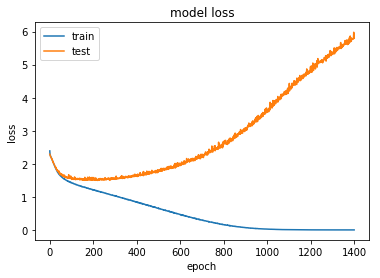

Saved trained model at /home/user/main_project/saved_models/Emotion_Voice_Detection_Model.h5 


In [77]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [78]:
preds = model.predict(x_testcnn,batch_size=32,verbose=1)

378/378 [==============================] - 0s 1ms/step


In [79]:
preds

array([[3.56157786e-19, 2.19408004e-36, 1.12074095e-30, ...,
        1.53657709e-07, 5.99237978e-07, 4.38542499e-14],
       [6.38011443e-06, 1.04831724e-06, 9.66341577e-06, ...,
        1.03350874e-32, 3.25284373e-21, 7.41577663e-16],
       [3.51375547e-06, 3.18251960e-02, 1.50539654e-05, ...,
        3.83448492e-27, 3.56213406e-16, 2.87089688e-14],
       ...,
       [3.65238482e-12, 1.58412970e-25, 1.36196718e-12, ...,
        4.46463190e-03, 5.19903377e-04, 4.32399793e-05],
       [3.64941428e-03, 8.23666749e-04, 2.75009330e-02, ...,
        9.46385498e-22, 1.61124926e-15, 2.06589772e-21],
       [6.15678971e-21, 3.20993051e-21, 3.81388063e-13, ...,
        4.38020509e-10, 4.72117332e-04, 9.84447837e-01]], dtype=float32)

In [80]:
preds1=preds.argmax(axis=1) 
prd = preds1.astype(int).flatten()
predictions=lb.inverse_transform((prd))
preddf = pd.DataFrame({'predicted_values':predictions})

In [81]:
preds1

array([5, 3, 4, 3, 5, 8, 0, 3, 6, 9, 9, 5, 7, 0, 1, 3, 4, 5, 8, 1, 9, 7,
       4, 6, 7, 8, 7, 7, 3, 2, 2, 7, 8, 0, 3, 7, 3, 2, 0, 9, 2, 8, 9, 9,
       9, 4, 1, 8, 2, 0, 6, 7, 4, 3, 8, 7, 6, 9, 1, 8, 5, 8, 8, 7, 1, 5,
       9, 5, 6, 1, 0, 5, 7, 4, 3, 6, 0, 8, 4, 7, 2, 5, 6, 7, 2, 3, 6, 4,
       6, 4, 0, 1, 8, 3, 7, 5, 4, 0, 4, 9, 6, 1, 1, 6, 7, 0, 0, 6, 8, 7,
       7, 4, 7, 0, 1, 6, 2, 4, 6, 9, 9, 2, 9, 6, 3, 0, 8, 6, 3, 5, 5, 6,
       4, 8, 9, 7, 9, 2, 9, 1, 8, 9, 9, 0, 1, 3, 3, 7, 4, 7, 8, 3, 2, 5,
       4, 6, 5, 8, 6, 5, 4, 4, 4, 6, 0, 2, 9, 8, 6, 2, 7, 6, 7, 7, 6, 1,
       6, 9, 8, 9, 8, 0, 5, 6, 8, 3, 0, 6, 1, 9, 8, 7, 2, 3, 1, 5, 3, 9,
       4, 6, 3, 5, 4, 1, 8, 7, 0, 9, 8, 6, 4, 9, 8, 4, 3, 3, 0, 4, 1, 5,
       4, 4, 6, 9, 8, 5, 5, 4, 2, 5, 3, 4, 4, 5, 7, 5, 8, 7, 2, 6, 0, 0,
       9, 8, 3, 6, 6, 3, 5, 8, 7, 6, 3, 1, 8, 2, 7, 7, 5, 0, 2, 2, 5, 1,
       7, 0, 5, 5, 6, 4, 2, 1, 0, 5, 3, 6, 0, 1, 7, 7, 4, 2, 3, 2, 6, 7,
       6, 6, 0, 8, 2, 3, 1, 3, 2, 6, 6, 7, 0, 5, 3,

In [82]:
prd

array([5, 3, 4, 3, 5, 8, 0, 3, 6, 9, 9, 5, 7, 0, 1, 3, 4, 5, 8, 1, 9, 7,
       4, 6, 7, 8, 7, 7, 3, 2, 2, 7, 8, 0, 3, 7, 3, 2, 0, 9, 2, 8, 9, 9,
       9, 4, 1, 8, 2, 0, 6, 7, 4, 3, 8, 7, 6, 9, 1, 8, 5, 8, 8, 7, 1, 5,
       9, 5, 6, 1, 0, 5, 7, 4, 3, 6, 0, 8, 4, 7, 2, 5, 6, 7, 2, 3, 6, 4,
       6, 4, 0, 1, 8, 3, 7, 5, 4, 0, 4, 9, 6, 1, 1, 6, 7, 0, 0, 6, 8, 7,
       7, 4, 7, 0, 1, 6, 2, 4, 6, 9, 9, 2, 9, 6, 3, 0, 8, 6, 3, 5, 5, 6,
       4, 8, 9, 7, 9, 2, 9, 1, 8, 9, 9, 0, 1, 3, 3, 7, 4, 7, 8, 3, 2, 5,
       4, 6, 5, 8, 6, 5, 4, 4, 4, 6, 0, 2, 9, 8, 6, 2, 7, 6, 7, 7, 6, 1,
       6, 9, 8, 9, 8, 0, 5, 6, 8, 3, 0, 6, 1, 9, 8, 7, 2, 3, 1, 5, 3, 9,
       4, 6, 3, 5, 4, 1, 8, 7, 0, 9, 8, 6, 4, 9, 8, 4, 3, 3, 0, 4, 1, 5,
       4, 4, 6, 9, 8, 5, 5, 4, 2, 5, 3, 4, 4, 5, 7, 5, 8, 7, 2, 6, 0, 0,
       9, 8, 3, 6, 6, 3, 5, 8, 7, 6, 3, 1, 8, 2, 7, 7, 5, 0, 2, 2, 5, 1,
       7, 0, 5, 5, 6, 4, 2, 1, 0, 5, 3, 6, 0, 1, 7, 7, 4, 2, 3, 2, 6, 7,
       6, 6, 0, 8, 2, 3, 1, 3, 2, 6, 6, 7, 0, 5, 3,

In [83]:
predictions

array(['male_angry', 'female_happy', 'female_sad', 'female_happy',
       'male_angry', 'male_happy', 'female_angry', 'female_happy',
       'male_calm', 'male_sad', 'male_sad', 'male_angry', 'male_fearful',
       'female_angry', 'female_calm', 'female_happy', 'female_sad',
       'male_angry', 'male_happy', 'female_calm', 'male_sad',
       'male_fearful', 'female_sad', 'male_calm', 'male_fearful',
       'male_happy', 'male_fearful', 'male_fearful', 'female_happy',
       'female_fearful', 'female_fearful', 'male_fearful', 'male_happy',
       'female_angry', 'female_happy', 'male_fearful', 'female_happy',
       'female_fearful', 'female_angry', 'male_sad', 'female_fearful',
       'male_happy', 'male_sad', 'male_sad', 'male_sad', 'female_sad',
       'female_calm', 'male_happy', 'female_fearful', 'female_angry',
       'male_calm', 'male_fearful', 'female_sad', 'female_happy',
       'male_happy', 'male_fearful', 'male_calm', 'male_sad',
       'female_calm', 'male_happy', 'male_a

In [84]:
preddf

,predicted_values
0,male_angry
1,female_happy
2,female_sad
3,female_happy
4,male_angry
5,male_happy
6,female_angry
7,female_happy
8,male_calm
9,male_sad


In [85]:
preddf.shape

(378, 1)

In [86]:
actual=y_test.argmax(axis=1) 
actualva=actual.astype(int).flatten()
actualvalue = (lb.inverse_transform((actualva)))
actualdf = pd.DataFrame({'actual_values':actualvalue})

In [87]:
actualdf

,actual_values
0,male_angry
1,female_happy
2,female_calm
3,female_sad
4,male_angry
5,male_sad
6,female_sad
7,female_angry
8,male_angry
9,male_calm


In [88]:
finaldf=actualdf.join(preddf)

In [89]:
finaldf[:10]

,actual_values,predicted_values
0,male_angry,male_angry
1,female_happy,female_happy
2,female_calm,female_sad
3,female_sad,female_happy
4,male_angry,male_angry
5,male_sad,male_happy
6,female_sad,female_angry
7,female_angry,female_happy
8,male_angry,male_calm
9,male_calm,male_sad


In [90]:
print(confusion_matrix(actualdf,preddf))

[[14  0  5  6  2  4  0  1  0  0]
 [ 0 12  0  3 14  1  1  1  0  3]
 [ 7  1  8  9  4  2  0  4  3  1]
 [ 6  2  8 12  5  0  1  4  1  0]
 [ 2  9  7  8  7  0  0  0  1  0]
 [ 2  0  2  0  0 20  4  7  5  1]
 [ 0  0  0  0  0  1 26  6  2 14]
 [ 0  0  1  2  1  4  2 14  3  2]
 [ 1  0  1  0  1  4  2  8 18  4]
 [ 1  1  1  0  1  4 11  2  9 11]]


In [91]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy is',metrics.accuracy_score(actualdf,preddf))

NameError: name 'metrics' is not defined

In [92]:
score=model.evaluate(x_testcnn, y_test, verbose=0)

In [93]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 37.57%
